In [1]:
#–¢–µ—Ä—Ä–∏—Ç–æ—Ä–∏—è —Ä–∞–∑–≤–∏—Ç–∏—è –ø–ª–µ–Ω–æ—á–Ω–æ–π —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–∏ 

In [47]:
import vk

In [48]:
token = ""  # –°–µ—Ä–≤–∏—Å–Ω—ã–π –∫–ª—é—á –¥–æ—Å—Ç—É–ø–∞, –ø–æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏–∏ –¥–∑ –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å –¥–ª—è —Å–æ–±–ª—é–¥–µ–Ω–∏—è –∫–æ–Ω—Ñ–∏–¥–µ–Ω—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏
session = vk.Session(access_token=token)  # –ê–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏—è
vk_api = vk.API(session)  # –ê–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏—è

In [49]:
personal_token = ""  # –ü–µ—Ä—Å–æ–Ω–∞–ª—å–Ω—ã–π –∫–ª—é—á –¥–æ—Å—Ç—É–ø–∞, –ø–æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏–∏ –¥–∑ –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å –¥–ª—è —Å–æ–±–ª—é–¥–µ–Ω–∏—è –∫–æ–Ω—Ñ–∏–¥–µ–Ω—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏
session = vk.Session(access_token=personal_token)  # –ê–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏—è
vk_personal_api = vk.API(session) #–ê–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏—è

In [50]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  # –ü–µ—Ä–≤–æ–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –º–µ—Ç–æ–¥–∞
    data = first["items"]  # –ü—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø–µ—Ä–≤—É—é —Ç—ã—Å—è—á—É id'—à–Ω–∏–∫–æ–≤
    count = first["count"] // 1000  # –ü—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—ã—Å—è—á —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤
    # –° –∫–∞–∂–¥—ã–º –ø—Ä–æ—Ö–æ–¥–æ–º —Ü–∏–∫–ª–∞ —Å–º–µ—â–µ–Ω–∏–µ offset —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –Ω–∞ —Ç—ã—Å—è—á—É
    # –∏ –µ—â–µ —Ç—ã—Å—è—á–∞ id'—à–Ω–∏–∫–æ–≤ –¥–æ–±–∞–≤–ª—è–µ—Ç—Å—è –∫ –Ω–∞—à–µ–º—É —Å–ø–∏—Å–∫—É.
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [51]:
members = get_members("zonazeleni")

In [52]:
print (len(members))

38873


In [53]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] # –Ω–∞—Ö–æ–¥–∏–º –∞–π–¥–∏ —É—á–∞—Å—Ç–Ω–∏–∫–∞
            first_name = member["first_name"] # –Ω–∞—Ö–æ–¥–∏–º –∏–º—è —É—á–∞—Ç–Ω–∏–∫–∞
            last_name = member["last_name"] # –Ω–∞—Ö–æ–¥–∏–º —Ñ–∞–º–∏–ª–∏—é —É—á–∞—Ç–Ω–∏–∫–∞
            
            sex = member["sex"] # –Ω–∞—Ö–æ–¥–∏–º –ø–æ–ª —É—á–∞—Ç–Ω–∏–∫–∞ (1 –∏–ª–∏ 2)
            if int(sex) == 1:  # –µ—Å–ª–∏ –ø–æ–ª —ç—Ç–æ 1 
                sex = "F"  # –æ–±–æ–∑–Ω–∞—á–µ–º –∂–µ–Ω—Å–∫–∏–π –ø–æ–ª –∫–∞–∫ F
            elif int(sex) == 2:  # –µ—Å–ª–∏ –ø–æ–ª —ç—Ç–æ 2 
                sex = "M" # –æ–±–æ–∑–Ω–∞—á–µ–º –º—É–∂—Å–∫–æ–π –ø–æ–ª –∫–∞–∫ F
            else:  # –µ—Å–ª–∏ –µ—Å—Ç—å –¥—Ä—É–≥–æ–π –∫–∞–∫–æ–π-—Ç–æ –ø–æ–ª
                sex = "-"  # —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –Ω–µ—Ç, –ø–æ—ç—Ç–æ–º—É —Å—Ç–∞–≤–∏–º –ø—Ä–æ—á–µ—Ä–∫
                
            bdate = member.get('bdate', "-")   # –Ω–∞—Ö–æ–¥–∏–º –¥–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏—è —É—á–∞—Ç–Ω–∏–∫–∞
            if len(bdate.split(".")) == 3:  # –Ω–∞–º –Ω—É–∂–µ–Ω —Ç–æ–ª—å–∫–æ –≥–æ–¥, –µ—Å–ª–∏ –æ–Ω –µ—Å—Ç—å
                bdate = bdate.split(".")[-1]  # —Ç–æ —Å–æ—Ö—Ä–∞–Ω—è–µ–º –≥–æ–¥
            else:  # –µ—Å–ª–∏ –≥–æ–¥ –Ω–µ —É–∫–∞–∑–∞–Ω, —Ç–æ –≤–æ–∑—Ä–∞—Å—Ç —É—á–∞—Å—Ç–Ω–∏–∫–∞ –º—ã –Ω–µ —É–∑–Ω–∞–µ–º
                bdate = "-"  # –ø–æ—ç—Ç–æ–º—É –ø—Ä–æ—á–µ—Ä–∫
                
            city = member.get('city', {}).get("title", "-")  # –Ω–∞—Ö–æ–¥–∏–º –≥–æ—Ä–æ–¥ —É—á–∞—Å—Ç–Ω–∏–∫–∞
            country = member.get('country', {}).get("title", "-")  # –Ω–∞—Ö–æ–¥–∏–º —Å—Ç—Ä–∞–Ω—É —É—á–∞—Å—Ç–Ω–∏–∫–∞
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  # —Å–æ—Ö—Ä–∞–Ω—è–µ

In [54]:
save_members_to_file ("zonazeleni_members", members)

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
import pandas as pd

df = pd.read_csv("zonazeleni_members", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [79]:
city_count  = df['city'].value_counts().drop('-') # —Å—á–∏—Ç–∞–µ–º –≥–æ—Ä–æ–¥–∞ –∏ —É–¥–∞–ª—è–µ–º –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –≥–æ—Ä–æ–¥–∞ –≤ —Ç–∞–±–ª–∏—á–∫–µ: "-"
city_count = city_count[:30] # –ø–µ—Ä–≤—ã–µ 30 –≥–æ—Ä–æ–¥–æ–≤
print(city_count)

Moscow              4477
Saint Petersburg    3533
Krasnodar            724
Yekaterinburg        443
Minsk                425
Rostov-on-Don        392
Novosibirsk          313
Nizhny Novgorod      313
Kazan                285
Krasnoyarsk          283
Samara               223
Omsk                 192
Voronezh             189
Ufa                  184
Perm                 171
Tyumen               163
Almaty               162
Chelyabinsk          153
Vladivostok          150
Kaliningrad          145
Saratov              142
Tomsk                141
Izhevsk              135
Simferopol           133
Volgograd            131
Irkutsk              106
Kaluga               105
Yaroslavl             96
Barnaul               92
Khabarovsk            89
Name: city, dtype: int64


In [58]:
sex_count  = df['sex'].value_counts().drop('-')  
print(sex_count)

F    26293
M    12445
Name: sex, dtype: int64


In [59]:
birth_count  = df['birth'].value_counts().drop('-') 
birth_count = birth_count[:20] 
print(birth_count)

2000    1754
2001    1616
1999    1378
2002    1255
1998    1163
1997     812
2003     760
2004     584
1996     573
2005     430
1995     399
2006     313
1994     309
1993     238
1990     179
1992     177
1902     158
1991     156
1988      98
1989      96
Name: birth, dtype: int64


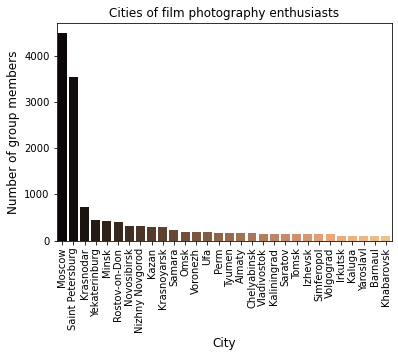

In [60]:
sns.barplot(city_count.index, city_count.values, palette='copper') # —Ä–∏—Å—É–µ–º –≥—Ä–∞—Ñ–∏–∫, –≤—ã–±–∏—Ä–∞–µ–º —Ü–≤–µ—Ç
plt.title('Cities of film photography enthusiasts')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=90) # —Ä–∞–∑–≤–æ—Ä–∞—á–∏–≤–∞–µ–º –ø–æ–¥–ø–∏—Å–∏ –ø–æ–¥ –≥–æ—Ä–æ–¥–∞–º–∏ –Ω–∞ 90 –≥—Ä–∞–¥—É—Å–æ–≤
plt.show() # –ø–æ–∫–∞–∑—ã–≤–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ

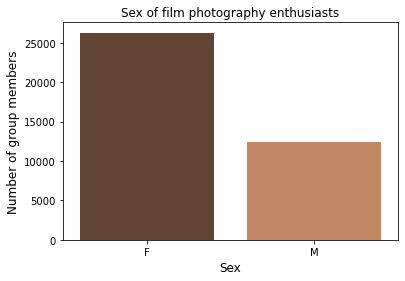

In [61]:
sns.barplot(sex_count.index, sex_count.values, palette='copper') # —Ä–∏—Å—É–µ–º –≥—Ä–∞—Ñ–∏–∫, –≤—ã–±–∏—Ä–∞–µ–º —Ü–≤–µ—Ç
plt.title('Sex of film photography enthusiasts')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.show() # –ø–æ–∫–∞–∑—ã–≤–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ

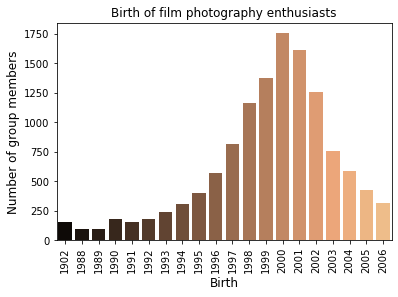

In [62]:
sns.barplot(birth_count.index, birth_count.values, palette='copper') # —Ä–∏—Å—É–µ–º –≥—Ä–∞—Ñ–∏–∫, –≤—ã–±–∏—Ä–∞–µ–º —Ü–≤–µ—Ç
plt.title('Birth of film photography enthusiasts')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('Birth', fontsize=12)
plt.xticks(rotation=90) # —Ä–∞–∑–≤–æ—Ä–∞—á–∏–≤–∞–µ–º –ø–æ–¥–ø–∏—Å–∏ –ø–æ–¥ –≥–æ—Ä–æ–¥–∞–º–∏ –Ω–∞ 90 –≥—Ä–∞–¥—É—Å–æ–≤
plt.show() # –ø–æ–∫–∞–∑—ã–≤–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ

<ipython-input-63-288570bba311>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') # –æ—Å—Ç–∞–≤–ª–µ–º —Ç–µ—Ö, –∫—Ç–æ —É–∫–∞–∑–∞–ª —Å–≤–æ–π –≤–æ–∑—Ä–∞—Å—Ç


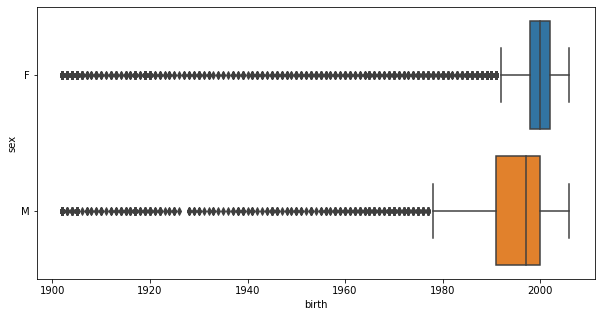

In [63]:
new_df = df[df['sex'].ne('-')] # –æ—Å—Ç–∞–≤–ª–µ–º —Ç–µ—Ö, –∫—Ç–æ —É–∫–∞–∑–∞–ª —Å–≤–æ–π –ø–æ–ª
new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') # –æ—Å—Ç–∞–≤–ª–µ–º —Ç–µ—Ö, –∫—Ç–æ —É–∫–∞–∑–∞–ª —Å–≤–æ–π –≤–æ–∑—Ä–∞—Å—Ç
plt.figure(figsize=(10,5)) # —Ä–∞–∑–º–µ—Ä –≥—Ä–∞—Ñ–∏–∫–∞
sns.boxplot(x="birth", y="sex", data=new_df) # —Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫

In [66]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"] # –ü—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø–µ—Ä–≤—É—é —Ç—ã—Å—è—á—É id'—à–Ω–∏–∫–æ–≤
    count = first["count"] // 100 # –ü—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—ã—Å—è—á —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤
    for i in range(1, count+1): 
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
        return [i['text'] for i in data]

In [67]:
zonazeleni_posts = get_posts("zonazeleni")
print (len(zonazeleni_posts))

200


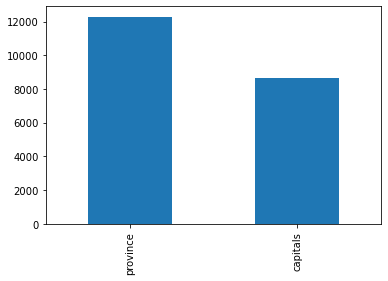

In [68]:
df.loc[(df['city'] == 'Moscow')] = "capitals" 
df.loc[(df['city'] == 'Saint Petersburg')] = "capitals" 
df.loc[(df['city'] == 'Kyiv')] = "capitals" 
df.loc[(df['city'] == 'Minsk')] = "capitals" 
df.loc[(df['city'] == 'Almaty')] = "capitals" 
df.loc[(df['city'] != "capitals") & (df['city'] != "-")] = "province" 
city_count = df['city'].value_counts().drop('-') # —Å—á–∏—Ç–∞–µ–º –≥–æ—Ä–æ–¥–∞ –∏ —É–¥–∞–ª—è–µ–º –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –≥–æ—Ä–æ–¥–∞ –≤ —Ç–∞–±–ª–∏—á–∫–µ: "-" 
city_count = city_count[:200] 

axes = city_count.plot.bar() # —Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫

In [69]:
import vk 

In [70]:
token = "2d8e70992d8e70992d8e7099f72dfa584422d8e2d8e709972fd70596da054fcc3ede5df"  # –°–µ—Ä–≤–∏—Å–Ω—ã–π –∫–ª—é—á –¥–æ—Å—Ç—É–ø–∞, –ø–æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏–∏ –¥–∑ –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å –¥–ª—è —Å–æ–±–ª—é–¥–µ–Ω–∏—è –∫–æ–Ω—Ñ–∏–¥–µ–Ω—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏
session = vk.Session(access_token=token)  # –ê–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏—è
vk_api = vk.API(session)  # –ê–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏—è

In [71]:
personal_token = "465843c5fafd5273ca10080981278049bc46ff2c31840bd13dd32902d87b7337274fdebe1bc1024a6f1de"  # –ü–µ—Ä—Å–æ–Ω–∞–ª—å–Ω—ã–π –∫–ª—é—á –¥–æ—Å—Ç—É–ø–∞, –ø–æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏–∏ –¥–∑ –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å –¥–ª—è —Å–æ–±–ª—é–¥–µ–Ω–∏—è –∫–æ–Ω—Ñ–∏–¥–µ–Ω—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏
session = vk.Session(access_token=personal_token)  # –ê–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏—è
vk_personal_api = vk.API(session) #–ê–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏—è

In [89]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  # –ü—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø–µ—Ä–≤—É—é —Ç—ã—Å—è—á—É id'—à–Ω–∏–∫–æ–≤
    count = first["count"] // 100  # –ü—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—ã—Å—è—á —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤
    # –° –∫–∞–∂–¥—ã–º –ø—Ä–æ—Ö–æ–¥–æ–º —Ü–∏–∫–ª–∞ —Å–º–µ—â–µ–Ω–∏–µ offset —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –Ω–∞ —Ç—ã—Å—è—á—É
    # –∏ –µ—â–µ —Ç—ã—Å—è—á–∞ id'—à–Ω–∏–∫–æ–≤ –¥–æ–±–∞–≤–ª—è–µ—Ç—Å—è –∫ –Ω–∞—à–µ–º—É —Å–ø–∏—Å–∫—É.
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return data

In [93]:
zonazeleni_posts = get_posts ('zonazeleni') 

In [94]:
from datetime import datetime

In [96]:
for i in zonazeleni_posts:
    print(i['text']) #—Ç–µ–∫—Å—Ç—ã
    
    print('likes:', i['likes']['count']) # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ  –ª–∞–π–∫–æ–≤
    print('reposts:', i['reposts']['count'])  # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ  —Ä–µ–ø–æ—Å—Ç–æ–≤
    print('comments:', i['comments']['count'])  # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ  –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤
    
    date = datetime.fromtimestamp(i['date'])
    print(date.year)
    
    print("==========")

Canon EOS 1v
Canon EF 85 mm f/1.8
Kodak Gold 200
likes: 391
reposts: 4
comments: 16
2020
–•–∞–Ω—á–∂–æ—É, –ö–∏—Ç–∞–π 
–§–≠–î –ú–∏–∫—Ä–æ–Ω 
Kodak Pro Image 
#—Ñ—ç–¥ #—Ñ—ç–¥–º–∏–∫—Ä–æ–Ω #kodak
likes: 115
reposts: 1
comments: 0
2020
–ê—Ä—Ö—ã–∑, —Å–µ–Ω—Ç—è–±—Ä—å
–ó–µ–Ω–∏—Ç-11
Fujifilm 400 Superia X-TRA
inst: gonkilod
likes: 206
reposts: 3
comments: 2
2020
–∞–≤–≥—É—Å—Ç-–æ–∫—Ç—è–±—Ä—å
–ü–µ—Ç–µ—Ä–±—É—Ä–≥

Canon eos 300 (sigma 30mm 1.4 art)
kodak gold 200
inst: rafaellsio
likes: 169
reposts: 2
comments: 0
2020
fujicolor c200
v. novgorod
inst: petruhito
likes: 179
reposts: 1
comments: 1
2020
–ê–ª—É—à—Ç–∞ 
Olympus 80g + kodak200
Inst: yalehovitskaya
likes: 292
reposts: 1
comments: 6
2020
kodak kb10
–ü–æ–¥ –†—è–∑–∞–Ω—å—é
likes: 305
reposts: 0
comments: 3
2020
Canon Prima AF-7
likes: 235
reposts: 1
comments: 3
2020
–°–æ–≤–µ—Ç—Å–∫–∏–π –º–æ–¥–µ—Ä–Ω–∏–∑–º –¢–±–∏–ª–∏—Å–∏.

Fujifilm 400
Canon Prima Super 28V 
Inst: kizilpasha
likes: 646
reposts: 16
comments: 0
2020
–°—Ç–∞–º–±—É–ª
Olympus Mju ii
Kodak Co

In [98]:
with open("zonazeleni_posts.txt", 'w', encoding="utf-8") as f:
    for i in zonazeleni_posts:
        texts = i['text']
        likes = 'likes:', i['likes']['count']
        reposts = 'reposts:', i['reposts']['count']
        comments = 'comments:', i['comments']['count']
        date = datetime.fromtimestamp(i['date'])
        year = date.year 
        f.write (str(texts)+"\n" + str(likes) +"\n"+ str(reposts)+"\n"+ str(comments)+"\n"+ str(date)+"\n"+ str(year)+"\n" + "========="+"\n")

In [99]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/julianalevina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [100]:
for i in zonazeleni_posts:
    year = 'likes:', i['likes']['count']

In [101]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [102]:
with open("zonazeleni_posts.txt", 'r', encoding='utf-8') as f:
    texts = f.read().lower()

In [103]:
words = word_tokenize(texts)
print (len(words))

134450


In [104]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words)

In [105]:
words = [i for i in words if i.isalnum()]
print (len(words))

46227


In [106]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    

In [107]:
clean_words = [word for word in words if word not in stop_words]

In [108]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words)

In [109]:
clean_words = [word for word in words if word not in stop_words]

In [110]:
print(f"–ë—ã–ª–æ: {len(words)}, –°—Ç–∞–ª–æ: {len(clean_words)}")

–ë—ã–ª–æ: 46227, –°—Ç–∞–ª–æ: 37519


In [111]:
count_words = Counter(clean_words).most_common(50)
print (count_words)

[('0', 3627), ('2018', 1700), ('2019', 1223), ('kodak', 1158), ('200', 1099), ('2020', 953), ('olympus', 757), ('inst', 752), ('400', 708), ('canon', 548), ('fuji', 438), ('mju', 408), ('color', 351), ('fujicolor', 286), ('fujifilm', 264), ('plus', 259), ('c200', 257), ('ii', 242), ('superia', 221), ('nikon', 219), ('zenit', 207), ('–∑–µ–Ω–∏—Ç', 203), ('zoom', 194), ('100', 193), ('eos', 176), ('minolta', 154), ('–ø–ª–µ–Ω–∫–∞', 141), ('pentax', 139), ('ilford', 138), ('colorplus', 132), ('gold', 131), ('superzoom', 120), ('portra', 114), ('prima', 109), ('11', 101), ('iii', 99), ('–ø—Ä–∏–≤–µ—Ç', 95), ('samsung', 89), ('agfa', 82), ('instagram', 81), ('konica', 81), ('trip', 78), ('super', 77), ('ultramax', 74), ('35', 72), ('af', 72), ('35mm', 71), ('mini', 67), ('122', 65), ('–ø–ª—ë–Ω–∫–∞', 64)]


In [115]:
def save_words_to_file(filename, count_words):
    with open(filename, 'w', encoding="utf-8") as f:
        for word_name in words:
            f.write(f"{word_name}\n")

In [116]:
save_words_to_file ("zonazeleni_popularwords.txt", count_words)

In [117]:
zonazeleni_films =  "('kodak', 1155), ('fuji', 438), ('mju', 408), ('minolta', 154), ('ilford', 138), ('portra', 114)"
print (zonazeleni_films)

('kodak', 1155), ('fuji', 438), ('mju', 408), ('minolta', 154), ('ilford', 138), ('portra', 114)


In [120]:
def save_words_to_file(filename, zonazeleni_films):
    with open(filename, 'w', encoding="utf-8") as f:
        for word_name in zonazeleni_films:
            f.write(f"{word_name}")

In [121]:
save_words_to_file ("zonazeleni_films.txt", zonazeleni_films)

In [122]:
zonazeleni_years =  "('2018', 1700), ('2019', 1223), ('2020', 953)"
print (zonazeleni_years)

('2018', 1700), ('2019', 1223), ('2020', 953)


In [123]:
save_words_to_file ("zonazeleni_years.txt", zonazeleni_years)

In [126]:
zonazeleni_cameras =  "('olympus', 757), ('canon', 548), ('nikon', 219), ('zenit', 207), ('–∑–µ–Ω–∏—Ç', 203), ('pentax', 139), ('samsung', 89)"
print (zonazeleni_cameras)

('olympus', 757), ('canon', 548), ('nikon', 219), ('zenit', 207), ('–∑–µ–Ω–∏—Ç', 203), ('pentax', 139), ('samsung', 89)


In [127]:
save_words_to_file ("zonazeleni_cameras.txt", zonazeleni_cameras)

In [124]:
with open ("besporyadokitehnologia_members", 'r', encoding='utf-8') as f:
    members1 = f.read().split("\n")
with open ("zonazeleni_members", 'r', encoding='utf-8') as f:
    members2 = f.read().split("\n")
with open ("tritaplenka_members.txt", 'r', encoding='utf-8') as f:
    members3 = f.read().split("\n")
with open ("plenka_predlozhka_members.tsv", 'r', encoding='utf-8') as f:
    members4 = f.read().split("\n")

In [125]:
members1 = set(members1)
members2 = set(members2)
members3 = set(members3)
members4 = set(members4)

In [126]:
united_members = members1.union(members2).union(members3).union(members4)
print(len(united_members))

337368


In [127]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] # –Ω–∞—Ö–æ–¥–∏–º –∞–π–¥–∏ —É—á–∞—Å—Ç–Ω–∏–∫–∞
            first_name = member["first_name"] # –Ω–∞—Ö–æ–¥–∏–º –∏–º—è —É—á–∞—Ç–Ω–∏–∫–∞
            last_name = member["last_name"] # –Ω–∞—Ö–æ–¥–∏–º —Ñ–∞–º–∏–ª–∏—é —É—á–∞—Ç–Ω–∏–∫–∞
            
            sex = member["sex"] # –Ω–∞—Ö–æ–¥–∏–º –ø–æ–ª —É—á–∞—Ç–Ω–∏–∫–∞ (1 –∏–ª–∏ 2)
            if int(sex) == 1:  # –µ—Å–ª–∏ –ø–æ–ª —ç—Ç–æ 1 
                sex = "F"  # –æ–±–æ–∑–Ω–∞—á–µ–º –∂–µ–Ω—Å–∫–∏–π –ø–æ–ª –∫–∞–∫ F
            elif int(sex) == 2:  # –µ—Å–ª–∏ –ø–æ–ª —ç—Ç–æ 2 
                sex = "M" # –æ–±–æ–∑–Ω–∞—á–µ–º –º—É–∂—Å–∫–æ–π –ø–æ–ª –∫–∞–∫ F
            else:  # –µ—Å–ª–∏ –µ—Å—Ç—å –¥—Ä—É–≥–æ–π –∫–∞–∫–æ–π-—Ç–æ –ø–æ–ª
                sex = "-"  # —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –Ω–µ—Ç, –ø–æ—ç—Ç–æ–º—É —Å—Ç–∞–≤–∏–º –ø—Ä–æ—á–µ—Ä–∫
                
            bdate = member.get('bdate', "-")   # –Ω–∞—Ö–æ–¥–∏–º –¥–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏—è —É—á–∞—Ç–Ω–∏–∫–∞
            if len(bdate.split(".")) == 3:  # –Ω–∞–º –Ω—É–∂–µ–Ω —Ç–æ–ª—å–∫–æ –≥–æ–¥, –µ—Å–ª–∏ –æ–Ω –µ—Å—Ç—å
                bdate = bdate.split(".")[-1]  # —Ç–æ —Å–æ—Ö—Ä–∞–Ω—è–µ–º –≥–æ–¥
            else:  # –µ—Å–ª–∏ –≥–æ–¥ –Ω–µ —É–∫–∞–∑–∞–Ω, —Ç–æ –≤–æ–∑—Ä–∞—Å—Ç —É—á–∞—Å—Ç–Ω–∏–∫–∞ –º—ã –Ω–µ —É–∑–Ω–∞–µ–º
                bdate = "-"  # –ø–æ—ç—Ç–æ–º—É –ø—Ä–æ—á–µ—Ä–∫
                
            city = member.get('city', {}).get("title", "-")  # –Ω–∞—Ö–æ–¥–∏–º –≥–æ—Ä–æ–¥ —É—á–∞—Å—Ç–Ω–∏–∫–∞
            country = member.get('country', {}).get("title", "-")  # –Ω–∞—Ö–æ–¥–∏–º —Å—Ç—Ä–∞–Ω—É —É—á–∞—Å—Ç–Ω–∏–∫–∞
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  # —Å–æ—Ö—Ä–∞–Ω—è–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –≤ —Ñ–∞–π–ª

In [128]:
save_members_to_file ("unitedmembers.tsv", members)

In [129]:
intersected_members = members1.intersection(members2).intersection(members3).intersection(members4)
print(len(intersected_members))

51
